## EJERCICIO 1 - PRACTICA

### Ejercicio hecho en Google Colab

#### La base de datos MNIST contiene imágenes de 28×28, en escala de grises, de números escritos a mano. Está conformada por 60.000 ejemplos de entrenamiento y 10.000 ejemplos de prueba.

In [ ]:
# Importo MNIST
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# import matplotlib
import matplotlib.pyplot as plt


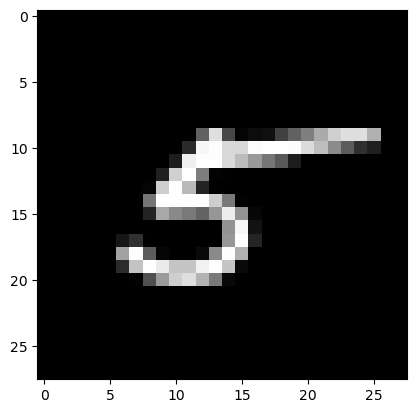

In [ ]:
nImg = 947 # nro. de imagen a visualizar
plt.imshow(X_train[nImg, :,:], cmap='gray')

### Inciso a)

### Generacion del modelo

In [ ]:
# %% Construccion del modelo
model = Sequential()

'''model.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), activation='relu', input_shape=[*IMG_SHAPE, 1] ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(TARGET_CNT, activation='softmax'))

'''
model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu', input_shape=[*IMG_SHAPE, 1] ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='leaky_relu'))
model.add(Dense(TARGET_CNT, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

model.summary()

## Entrenamiento del modelo

In [ ]:
!pip install livelossplot --quiet

LOTES  = 32
EPOCAS = 25

from livelossplot import PlotLossesKeras

# %% Entrenamiento del modelo usando datos de entrenamiento y validacion
H = model.fit(x=X_train, y=Y_train, batch_size=LOTES,
              epochs=EPOCAS, validation_split=0.2, callbacks=[PlotLossesKeras()], verbose=0)


fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")


print (X_train.shape)
pred = model.predict(X_train)

cm = metrics.confusion_matrix(np.argmax(Y_train, axis=1), np.argmax(pred, axis=1))
plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')


# %% evalua el modelo para entrenamiento y testeo
pred = model.evaluate(X_train, Y_train, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de validacion
pred = model.evaluate(X_test, Y_test, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))

## Salvo el modelo

In [1]:
WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.

SyntaxError: invalid syntax (<ipython-input-1-c26197ecfa36>, line 1)

## Recupero el modelo

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('MNIST_conv_model.h5')

## Inciso b)

Levante el modelo guardado en el punto a) y utilice la clase DrawPanel del módulo utils.images de
la carpeta fuentes para generar un dibujo escrito a mano de un dígito y predecir la clase a la que
pertenece.

In [ ]:
Levante el modelo guardado en el punto a) y utilice la clase DrawPanel del módulo utils.imagesimport numpy as np
from ClassDrawPanel import DrawPanel
from PIL import Image, ImageOps

IMG_SHAPE=(28,28)

dp = DrawPanel()
image = dp.draw(size=IMG_SHAPE, line_width=2.0, scale = 5)

# obtiene canal de dibujo y normaliza a [0, 1]
gs_image = np.array(image)[:,:,3]/255

# prepara formato para funcion de prediccion
gs_image = gs_image.reshape(1,*IMG_SHAPE,1)

# obtiene salida (sofmax)
resp = model.predict(gs_image, verbose=0)

# posición de la neurona de salida con mayor valor
digito = np.argmax(resp)

print("El trazo dibujado corresponde al dígito %d" % digito)
